# table — efficiency

**Motivation**: host = ```mach```, device = ```cuda:2``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 2
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:2  ———  host: mach

In [3]:
def _eval(seq_total: int = 1000, color='C0'):
    if tr.model.cfg.seq_len == 1:
        seq_total = 1
    results = tr.analysis('vld', seq_total=seq_total, n_data_batches=5, verbose=False)
    
    fig, axes = plot_convergence(results, color=color, display=False)
    fig.suptitle(name, fontsize=16, fontfamily='monospace', color='darkgreen', y=1.1)
    display(fig)

## LCA

In [4]:
data = np.load("/Data/DOVES/xtract16/processed.npy")
train, val = data[:80].reshape(-1, 16*16), data[80:].reshape(-1, 16*16)

dr = "/shared/hyperparams/"
files = [f for f in os.listdir(dr) if f.endswith(".npz")]
loaded = {f: np.load(dr + f) for f in files}

recons = {f: d['recons'] for f, d in loaded.items()}
activations = {f: d['activations'] for f, d in loaded.items()}
dictionary = {f: d['dictionary'] for f, d in loaded.items()}

In [5]:
lca_results_str = {}

for k, z in activations.items():
    beta = float(k.split('-')[1].split(':')[1])
    beta = np.round(beta, 2)

    mse = ((recons[k] - val) ** 2).sum(1)
    mu, sd = mse.mean(), mse.std()
    mu, sd = f"{mu:0.1f}", f"{sd:0.1f}".lstrip('0')
    entry_mse = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    lifetime = sparse_score(z.astype('float32'))[0]
    mu, sd = lifetime.mean(), lifetime.std()
    mu, sd = f"{mu:0.2f}", f"{sd:0.2f}".lstrip('0')
    entry_lifetime = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    percent_zero = (z == 0).mean() * 100

    s = '\n'.join([
        f"beta\t=\t{beta:0.2f}",
        f"MSE\t=\t{entry_mse}",
        f"life\t=\t{entry_lifetime}",
        f"% zero\t=\t{percent_zero:0.1f}",
    ])
    lca_results_str[beta] = s

lca_results_str = dict(sorted(lca_results_str.items()))

In [6]:
for b, s in lca_results_str.items():
    print(s)
    print('\n')

beta    =       0.07
MSE     =       \entry{10.2}{9.1}
life    =       \entry{0.65}{.01}
% zero  =       45.2

beta    =       0.09
MSE     =       \entry{10.6}{8.5}
life    =       \entry{0.67}{.01}
% zero  =       48.2

beta    =       0.11
MSE     =       \entry{11.2}{7.9}
life    =       \entry{0.70}{.01}
% zero  =       51.6

beta    =       0.14
MSE     =       \entry{11.7}{7.6}
life    =       \entry{0.73}{.01}
% zero  =       56.2

beta    =       0.18
MSE     =       \entry{11.3}{7.2}
life    =       \entry{0.75}{.02}
% zero  =       60.0

beta    =       0.22
MSE     =       \entry{12.9}{7.2}
life    =       \entry{0.77}{.02}
% zero  =       62.6

beta    =       0.28
MSE     =       \entry{16.1}{8.1}
life    =       \entry{0.79}{.02}
% zero  =       65.6

beta    =       0.35
MSE     =       \entry{21.1}{10.4}
life    =       \entry{0.82}{.02}
% zero  =       69.4

beta    =       0.44
MSE     =       \entry{28.5}{14.1}
life    =       \entry{0.86}{.02}
% zero  =       73.9

beta    =       0.56
MSE     =       \entry{38.3}{19.0}
life    =       \entry{0.89}{.02}
% zero  =       78.8

beta    =       0.70
MSE     =       \entry{50.1}{25.2}
life    =       \entry{0.92}{.01}
% zero  =       83.4

beta    =       0.88
MSE     =       \entry{64.4}{32.1}
life    =       \entry{0.94}{.01}
% zero  =       87.4

beta    =       1.11
MSE     =       \entry{79.9}{38.5}
life    =       \entry{0.96}{.01}
% zero  =       90.7

beta    =       1.40
MSE     =       \entry{96.4}{43.5}
life    =       \entry{0.97}{.01}
% zero  =       93.5

beta    =       1.76
MSE     =       \entry{113.5}{47.2}
life    =       \entry{0.98}{.01}
% zero  =       95.7

beta    =       2.21
MSE     =       \entry{130.9}{49.4}
life    =       \entry{0.99}{.00}
% zero  =       97.4

beta    =       2.79
MSE     =       \entry{147.4}{50.3}
life    =       \entry{0.99}{.00}
% zero  =       98.5

beta    =       3.51
MSE     =       \entry{161.9}{50.1}
life    =       \entry{1.00}{.00}
% zero  =       99.3

beta    =       4.42
MSE     =       \entry{172.9}{48.8}
life    =       \entry{1.00}{.00}
% zero  =       99.7

beta    =       5.56
MSE     =       \entry{179.4}{47.0}
life    =       \entry{1.00}{.00}
% zero  =       99.9

beta    =       7.00
MSE     =       \entry{183.1}{45.4}
life    =       \entry{1.00}{.00}
% zero  =       100.0

In [7]:
for b, s in lca_results_str.items():
    if b > 0.7:
        continue
    print(s)
    print('\n')

beta    =       0.07
MSE     =       \entry{10.2}{9.1}
life    =       \entry{0.65}{.01}
% zero  =       45.2

beta    =       0.09
MSE     =       \entry{10.6}{8.5}
life    =       \entry{0.67}{.01}
% zero  =       48.2

beta    =       0.11
MSE     =       \entry{11.2}{7.9}
life    =       \entry{0.70}{.01}
% zero  =       51.6

beta    =       0.14
MSE     =       \entry{11.7}{7.6}
life    =       \entry{0.73}{.01}
% zero  =       56.2

beta    =       0.18
MSE     =       \entry{11.3}{7.2}
life    =       \entry{0.75}{.02}
% zero  =       60.0

beta    =       0.22
MSE     =       \entry{12.9}{7.2}
life    =       \entry{0.77}{.02}
% zero  =       62.6

beta    =       0.28
MSE     =       \entry{16.1}{8.1}
life    =       \entry{0.79}{.02}
% zero  =       65.6

beta    =       0.35
MSE     =       \entry{21.1}{10.4}
life    =       \entry{0.82}{.02}
% zero  =       69.4

beta    =       0.44
MSE     =       \entry{28.5}{14.1}
life    =       \entry{0.86}{.02}
% zero  =       73.9

beta    =       0.56
MSE     =       \entry{38.3}{19.0}
life    =       \entry{0.89}{.02}
% zero  =       78.8

beta    =       0.70
MSE     =       \entry{50.1}{25.2}
life    =       \entry{0.92}{.01}
% zero  =       83.4

## VAE: amort and iterative

In [8]:
kws = dict(
    device=device,
    shuffle=False,
    strict=True,
)

## BRAIN-SAE

In [9]:
brain_models = {
    '<jacob|lin>_(64,32.0)': dict(
        model_name='poisson_vH16_t-64_z-[512]_<jacob|lin>',
        fit_name='u:(8.0)-du:(7.0)_b200-ep300-lr(0.002)_beta(32:0x0.1)_temp(0.05:lin-0.5)_gr(500)_(2024_09_12,20:23)',
    ),
    '<jacob|lin>_(8,4.0)': dict(
        model_name='poisson_vH16_t-8_z-[512]_<jacob|lin>',
        fit_name='u:(8.0)-du:(7.0)_b200-ep300-lr(0.002)_beta(4:0x0.1)_temp(0.05:lin-0.5)_gr(500)_(2024_09_12,20:27)',
    ),
    '<jacob|lin>_(4,4.0)': dict(
        model_name='poisson_vH16_t-4_z-[512]_<jacob|lin>',
        fit_name='u:(8.0)-du:(7.0)_b200-ep300-lr(0.002)_beta(4:0x0.1)_temp(0.05:lin-0.5)_gr(500)_(2024_09_12,18:21)',
    ),
}
brain_models = {
    k: {**d, **kws} for
    k, d in brain_models.items()
    if len(d['model_name']) > 0
}

In [10]:
brain_results_str = {}

for name, kwargs in brain_models.items():
    tr, meta = load_model(**kwargs)

    results = tr.analysis(
        dl='vld',
        seq_total=1 if tr.model.cfg.seq_len == 1 else 1000,
        n_data_batches=None,
        avg_samples=False,
        verbose=True,
    )

    mse = results['mse'][:, -1]
    mu, sd = mse.mean(), mse.std()
    mu, sd = f"{mu:0.1f}", f"{sd:0.1f}".lstrip('0')
    entry_mse = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    lifetime = sparse_score(results['samples_final'])[0]
    mu, sd = lifetime.mean(), lifetime.std()
    mu, sd = f"{mu:0.2f}", f"{sd:0.2f}".lstrip('0')
    entry_lifetime = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    percent_zero = (results['samples_final'] == 0).mean() * 100

    n_params = sum([
        p.nelement() for p
        in tr.parameters()
    ])
    s = '\n'.join([
        f"# params: {n_params/1e6:0.2f} M",
        f"MSE = {entry_mse}",
        f"lifetime = {entry_lifetime}",
        f"% zero = {percent_zero:0.1f}",
    ])
    brain_results_str[name] = s

    print(f"{name}\n\n{s}\n\n")

100%|███████████████████████████████| 130/130 [05:47<00:00,  2.68s/it]


<jacob|lin>_(64,32.0)

# params: 0.13 M
MSE = \entry{12.0}{2.6}
lifetime = \entry{0.79}{.03}
% zero = 60.0

100%|███████████████████████████████| 130/130 [05:03<00:00,  2.33s/it]


<jacob|lin>_(8,4.0)

# params: 0.13 M
MSE = \entry{27.5}{7.1}
lifetime = \entry{0.85}{.02}
% zero = 73.2

100%|███████████████████████████████| 130/130 [04:59<00:00,  2.31s/it]


<jacob|lin>_(4,4.0)

# params: 0.13 M
MSE = \entry{50.4}{15.5}
lifetime = \entry{0.90}{.03}
% zero = 83.3

____________________________________________________________________________________________________

<jacob|lin>_(64,32.0)   # params: 0.13 M

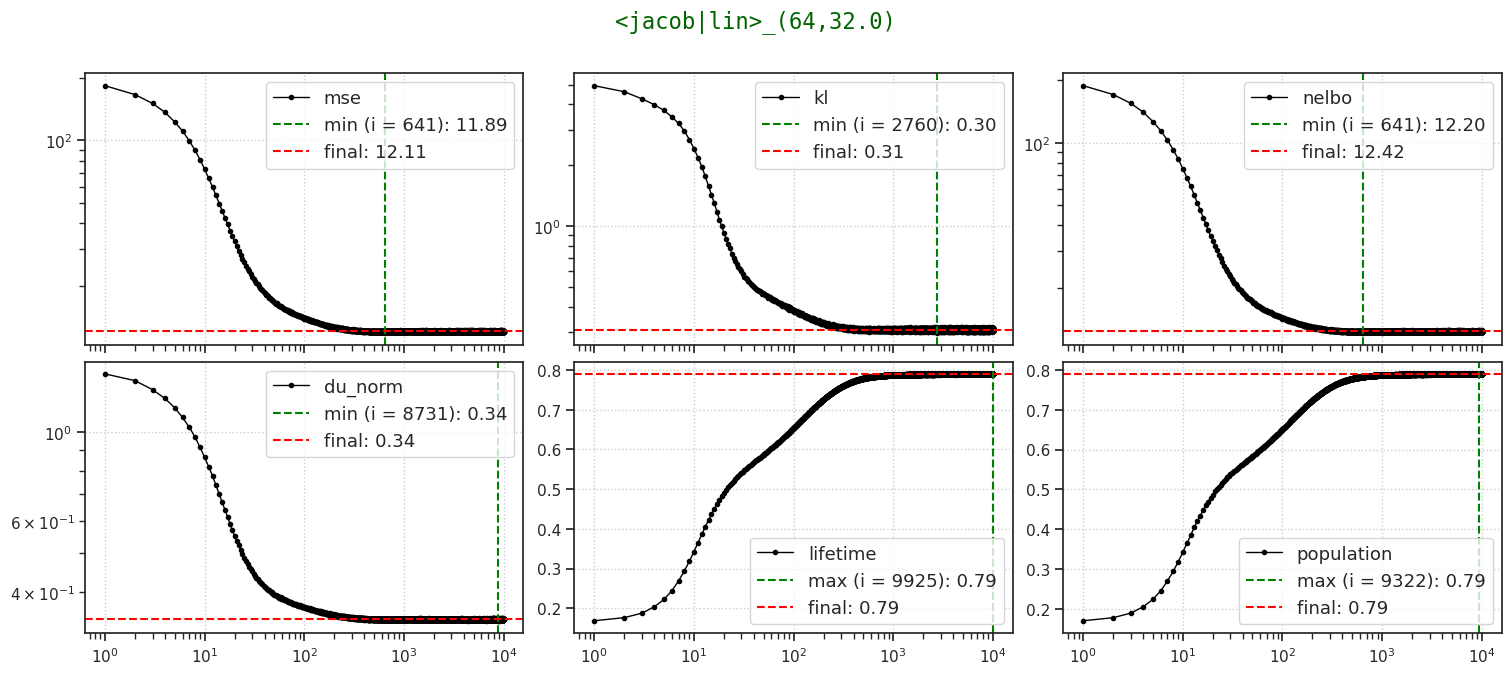

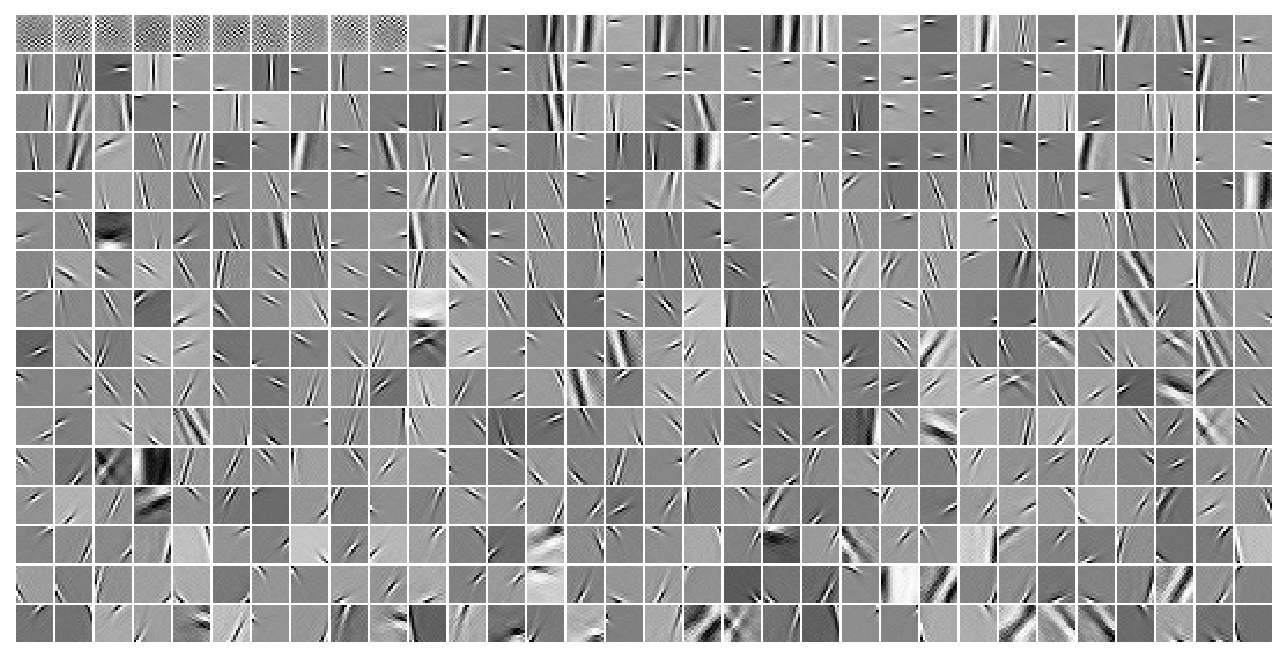

____________________________________________________________________________________________________

<jacob|lin>_(8,4.0)     # params: 0.13 M

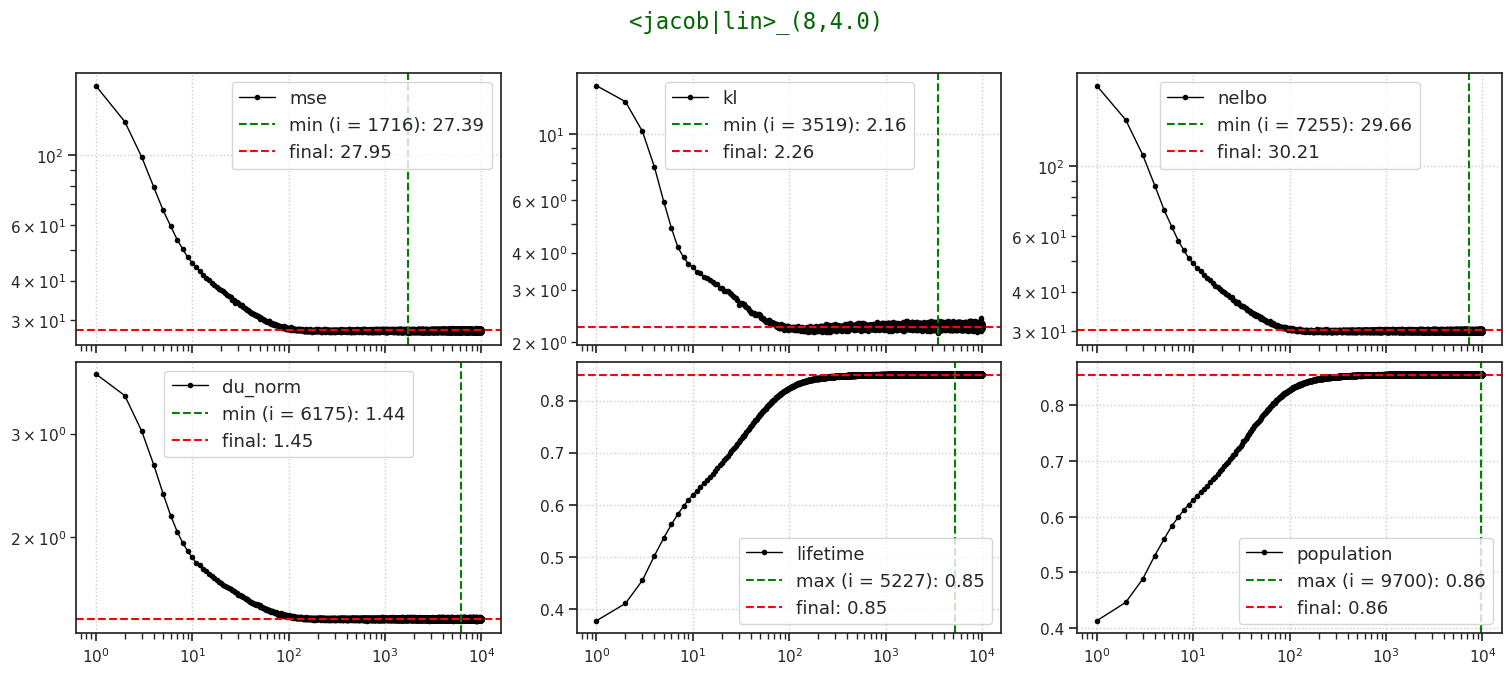

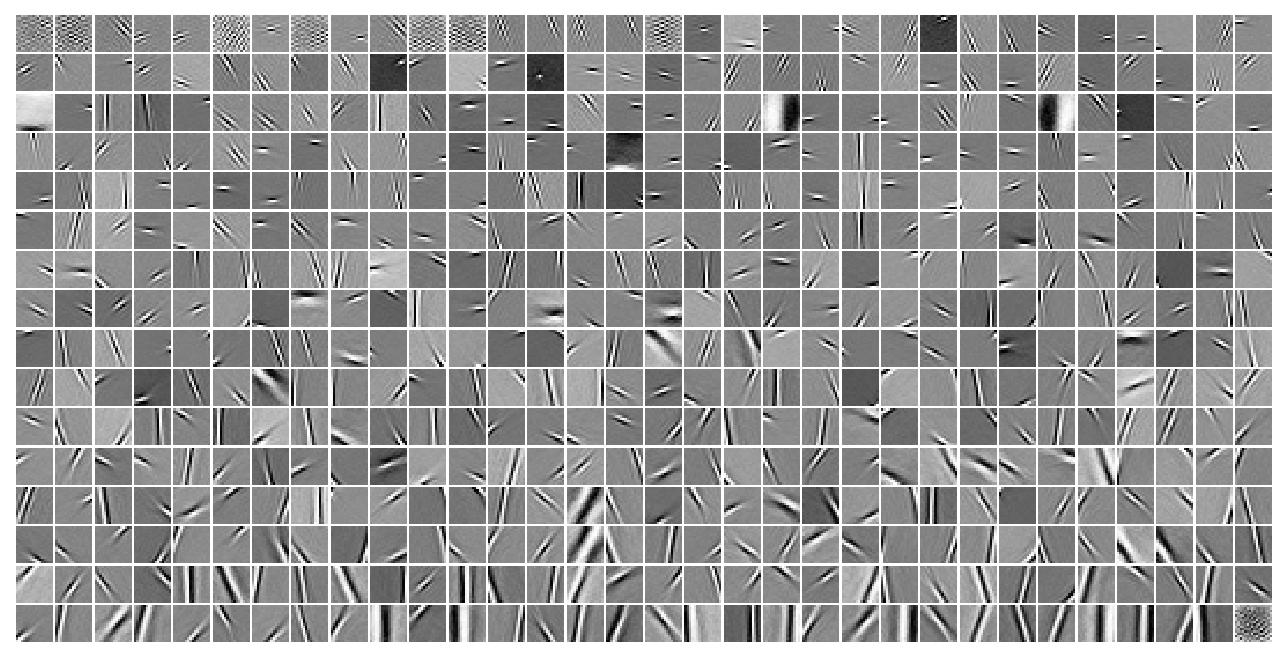

____________________________________________________________________________________________________

<jacob|lin>_(4,4.0)     # params: 0.13 M

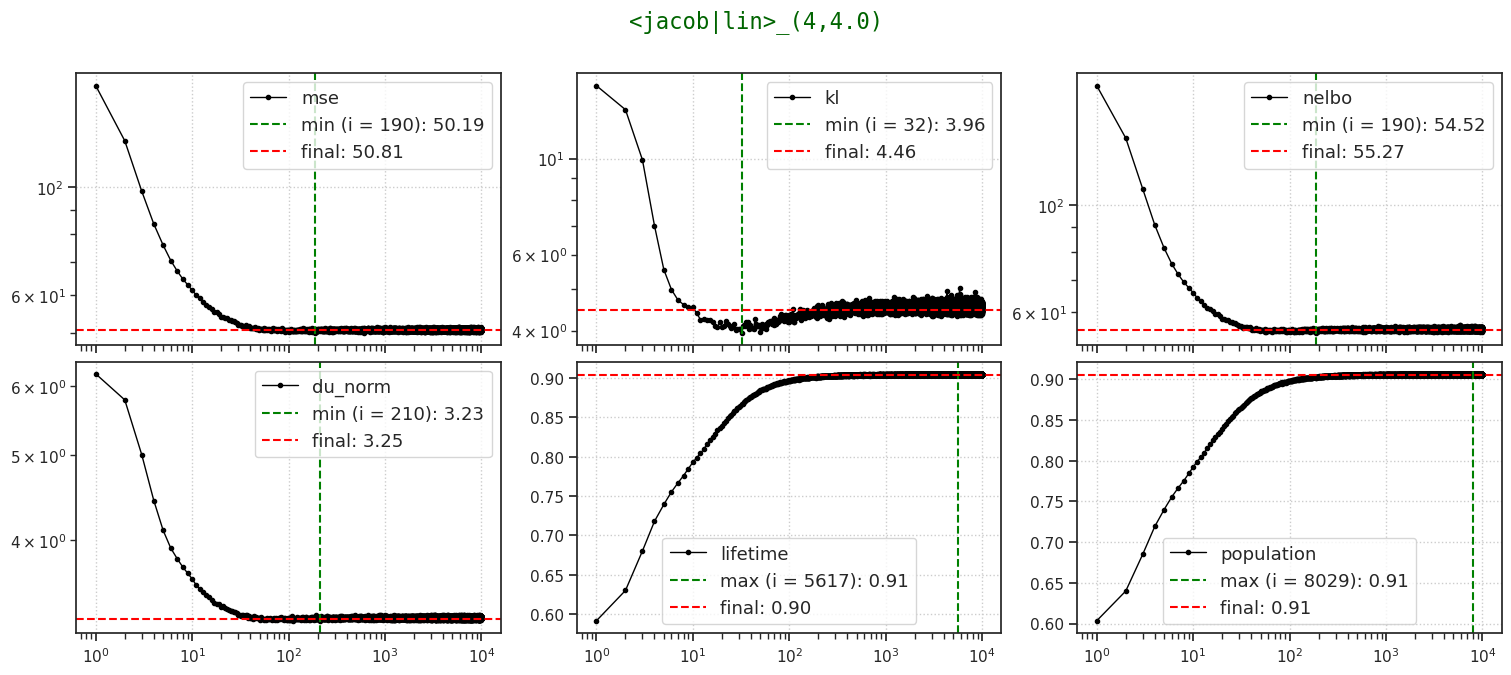

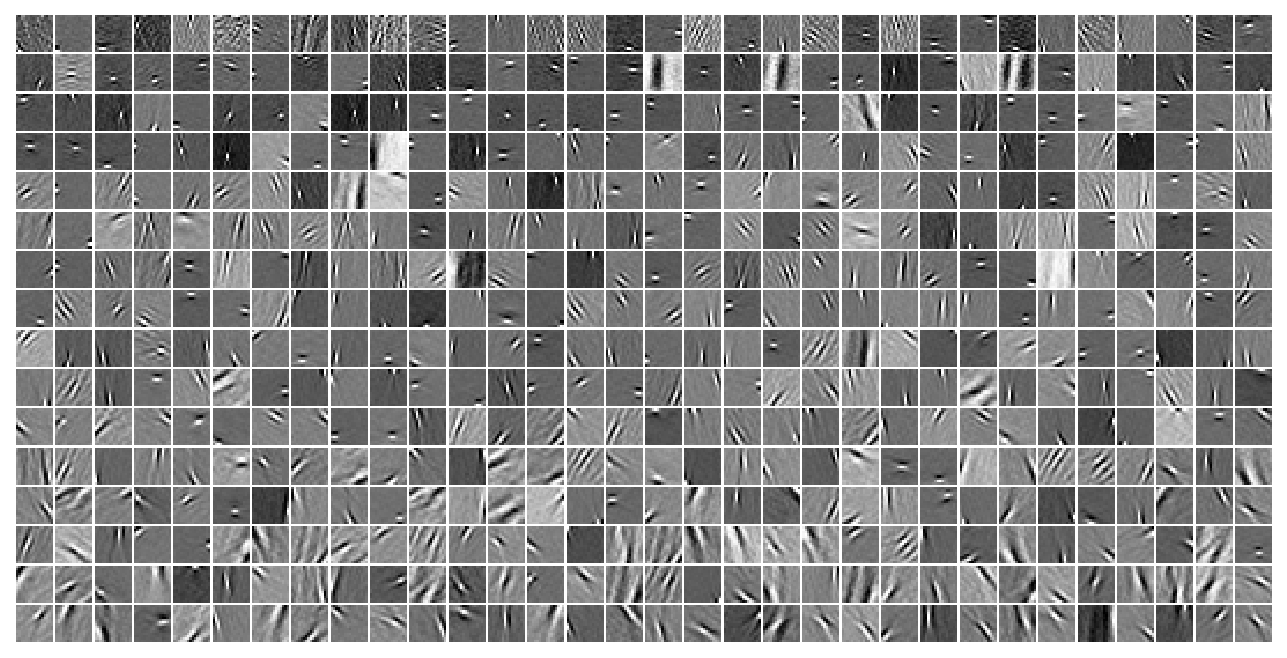

CPU times: user 8min 51s, sys: 47.2 s, total: 9min 38s
Wall time: 8min 25s


In [10]:
%%time


for name, kwargs in brain_models.items():
    tr, meta = load_model(**kwargs)
    num_params = sum([
    	p.nelement() for p
        in tr.parameters()
    ])

    print('_' * 100)
    print(f"{name}\t# params: {num_params/1e6:0.2f} M")
    
    _eval(10_000, 'k')

    log_rate = tonp(tr.model.layer.log_rate.squeeze())
    _ = tr.model.show(order=np.argsort(log_rate))

    print('\n\n')

## P-VAE

In [11]:
pvae_models = {
    '<conv|lin>_(1,0.25)': dict(
        model_name='poisson_vH16_t-1_z-[512]_k-64_<conv|lin>',
        fit_name='b200-ep300-lr(0.002)_beta(0.25:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,12:53)',
    ),
    '<conv|lin>_(1,0.5)': dict(
        model_name='poisson_vH16_t-1_z-[512]_k-64_<conv|lin>',
        fit_name='b200-ep300-lr(0.002)_beta(0.5:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,09:56)',
    ),
    '<conv|lin>_(1,0.75)': dict(
        model_name='poisson_vH16_t-1_z-[512]_k-64_<conv|lin>',
        fit_name='b200-ep300-lr(0.002)_beta(0.75:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,11:22)',
    ),
    '<conv|lin>_(1,1.0)': dict(
        model_name='poisson_vH16_t-1_z-[512]_k-64_<conv|lin>',
        fit_name='b200-ep300-lr(0.002)_beta(1:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,03:28)',
    ),
    '<conv|lin>_(1,1.5)': dict(
        model_name='poisson_vH16_t-1_z-[512]_k-64_<conv|lin>',
        fit_name='b200-ep300-lr(0.002)_beta(1.5:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,14:29)',
    ),
    # Amortized, linear encoder:
    '<lin|lin>_(1,1.0)_anneal:0.5': dict(
        model_name='poisson_vH16_t-1_z-[512]_<lin|lin>',
        fit_name='b1000-ep3000-lr(0.002)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(200)_(2024_09_24,21:51)',
    ),
}
pvae_models = {
    k: {**d, **kws} for
    k, d in pvae_models.items()
    if len(d['model_name']) > 0
}

In [12]:
pvae_results_str = {}

for name, kwargs in pvae_models.items():
    tr, meta = load_model(**kwargs)

    results = tr.analysis(
        dl='vld',
        seq_total=1 if tr.model.cfg.seq_len == 1 else 1000,
        n_data_batches=None,
        avg_samples=False,
        verbose=True,
    )

    mse = results['mse'][:, -1]
    mu, sd = mse.mean(), mse.std()
    mu, sd = f"{mu:0.1f}", f"{sd:0.1f}".lstrip('0')
    entry_mse = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    lifetime = sparse_score(results['samples_final'])[0]
    mu, sd = lifetime.mean(), lifetime.std()
    mu, sd = f"{mu:0.2f}", f"{sd:0.2f}".lstrip('0')
    entry_lifetime = f"\entry{'{'}{mu}{'}'}{'{'}{sd}{'}'}"

    percent_zero = (results['samples_final'] == 0).mean() * 100

    n_params = sum([
        p.nelement() for p
        in tr.parameters()
    ])
    s = '\n'.join([
        f"# params: {n_params/1e6:0.2f} M",
        f"MSE = {entry_mse}",
        f"lifetime = {entry_lifetime}",
        f"% zero = {percent_zero:0.1f}",
    ])
    pvae_results_str[name] = s

    print(f"{name}\n\n{s}\n\n")

100%|██████████████████████████████| 130/130 [00:00<00:00, 191.09it/s]


<conv|lin>_(1,0.25)

# params: 3.44 M
MSE = \entry{74.4}{12.9}
lifetime = \entry{0.58}{.11}
% zero = 37.7

100%|██████████████████████████████| 130/130 [00:00<00:00, 241.40it/s]


<conv|lin>_(1,0.5)

# params: 3.44 M
MSE = \entry{101.9}{25.3}
lifetime = \entry{0.76}{.16}
% zero = 65.9

100%|██████████████████████████████| 130/130 [00:00<00:00, 243.25it/s]


<conv|lin>_(1,0.75)

# params: 3.44 M
MSE = \entry{119.4}{26.4}
lifetime = \entry{0.83}{.09}
% zero = 77.7

100%|██████████████████████████████| 130/130 [00:00<00:00, 243.78it/s]


<conv|lin>_(1,1.0)

# params: 3.44 M
MSE = \entry{131.8}{31.2}
lifetime = \entry{0.90}{.08}
% zero = 88.0

100%|██████████████████████████████| 130/130 [00:00<00:00, 241.28it/s]


<conv|lin>_(1,1.5)

# params: 3.44 M
MSE = \entry{149.3}{35.2}
lifetime = \entry{0.95}{.03}
% zero = 94.6

100%|████████████████████████████████| 26/26 [00:00<00:00, 129.02it/s]


<lin|lin>_(1,1.0)_anneal:0.5

# params: 0.26 M
MSE = \entry{134.3}{29.7}
lifetime = \entry{0.80}{.06}
% zero = 75.9

____________________________________________________________________________________________________

<conv|lin>_(1,0.25)     # params: 3.44 M

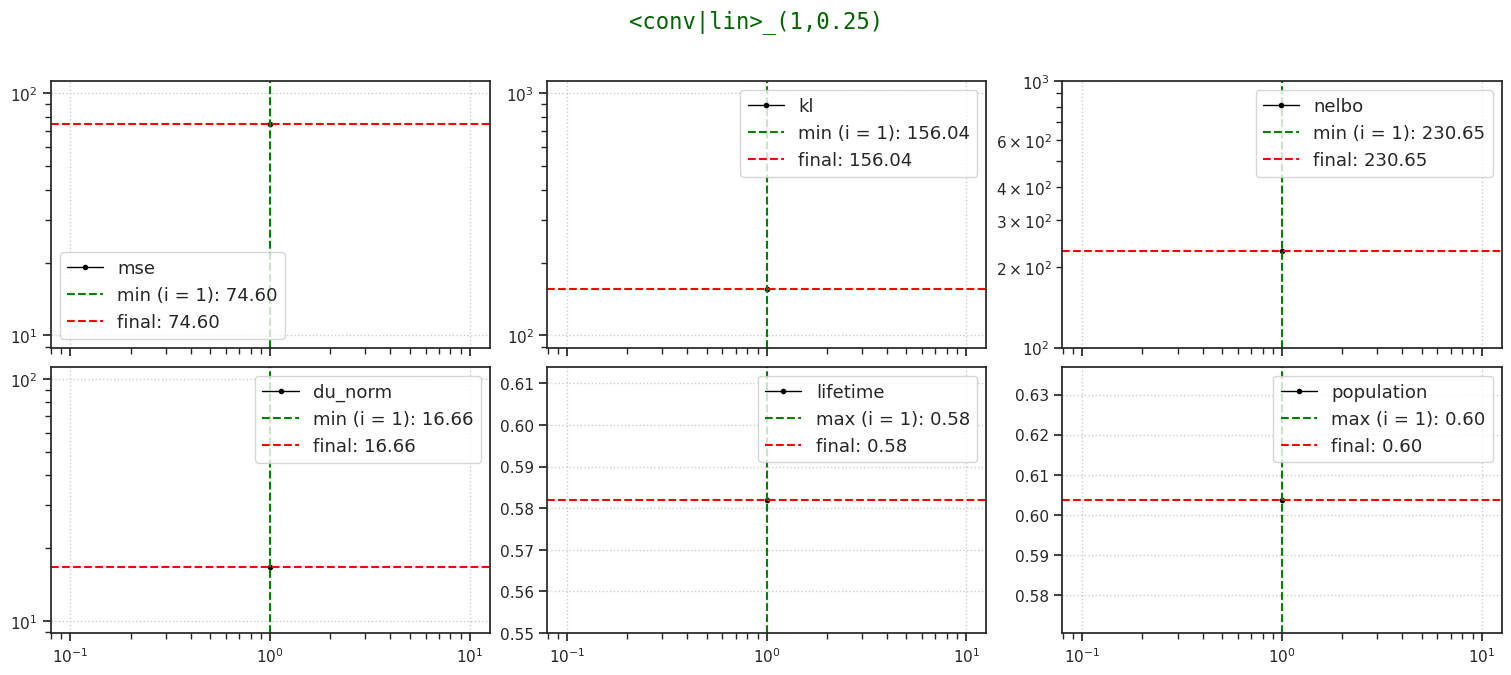

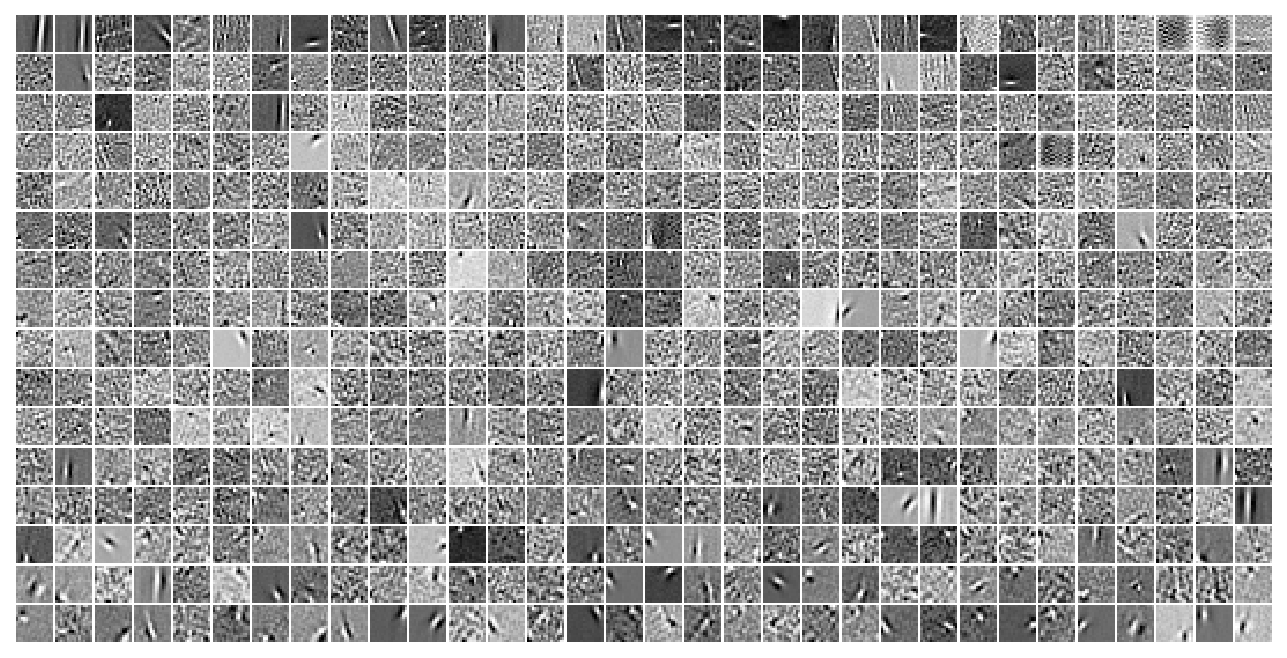

____________________________________________________________________________________________________

<conv|lin>_(1,0.5)      # params: 3.44 M

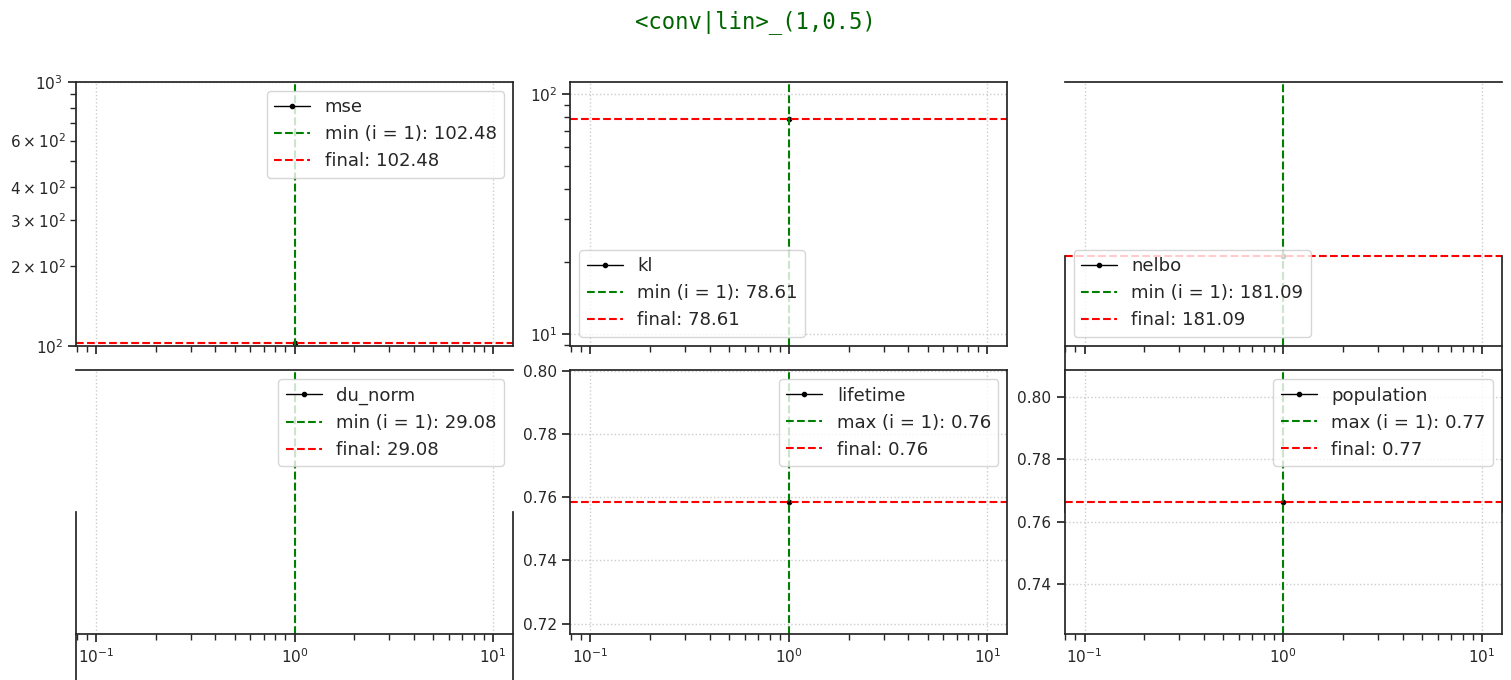

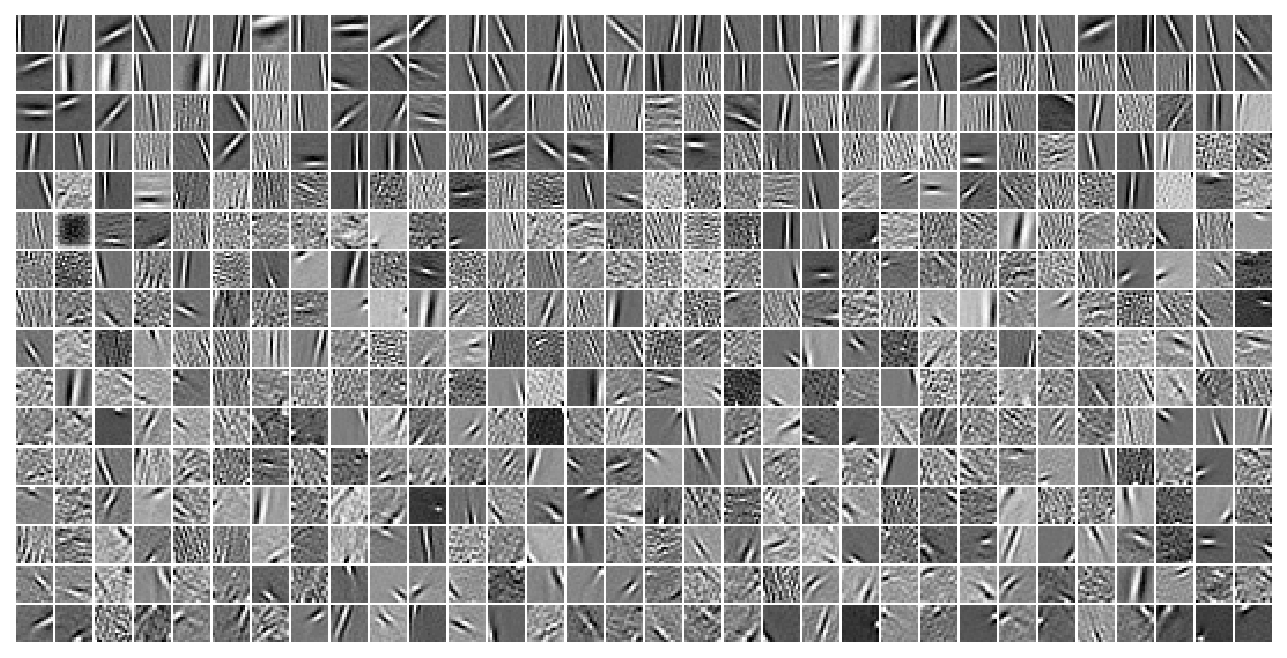

____________________________________________________________________________________________________

<conv|lin>_(1,0.75)     # params: 3.44 M

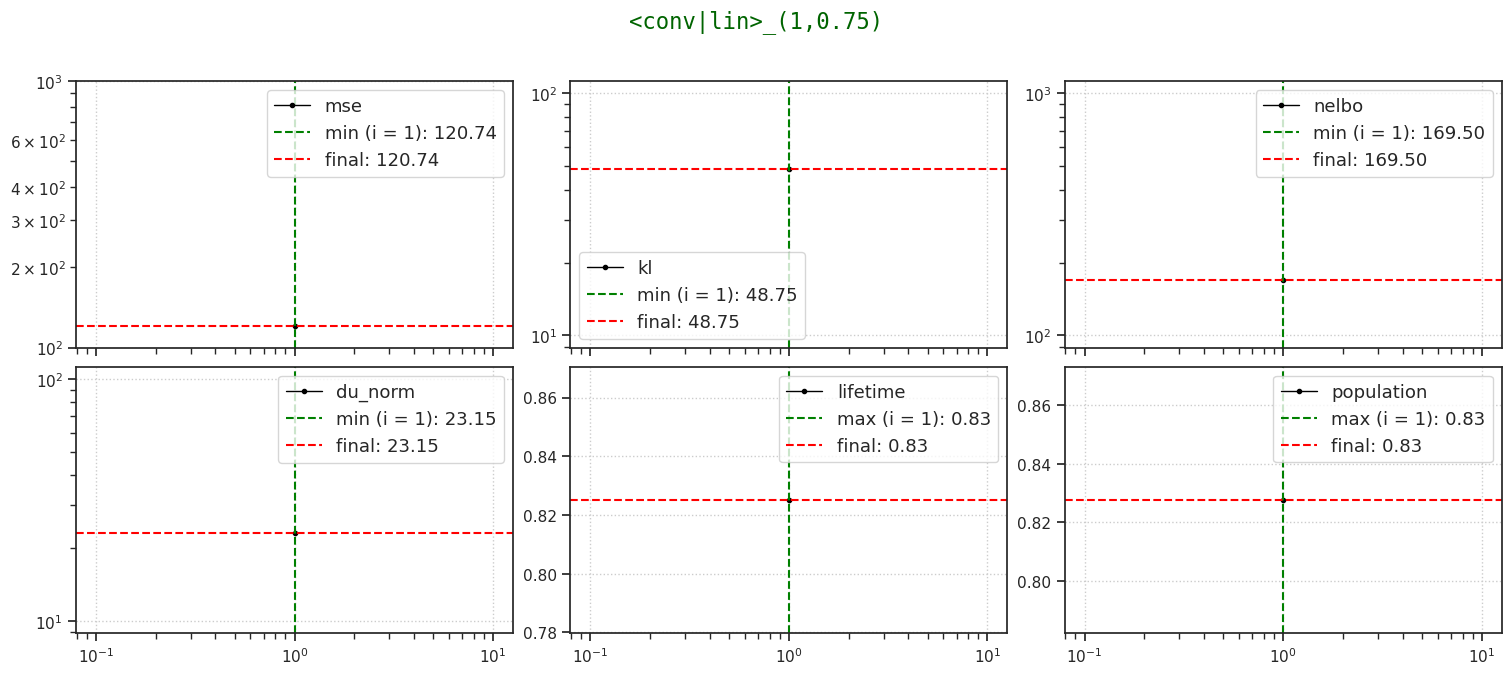

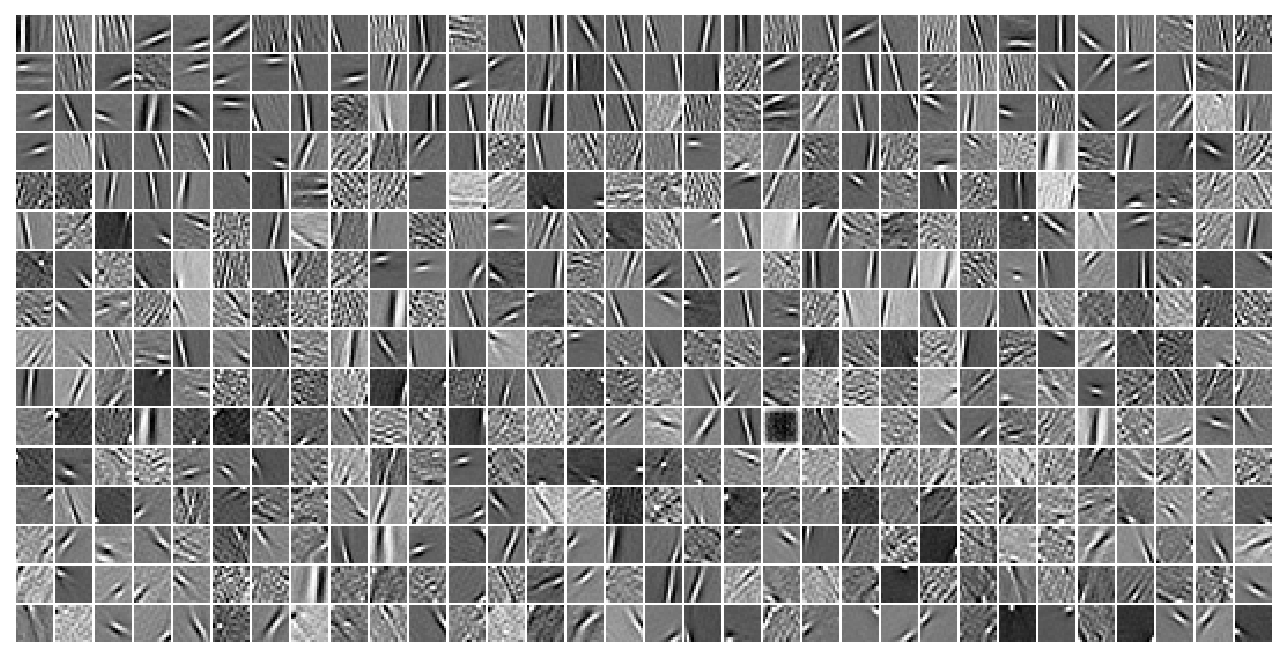

____________________________________________________________________________________________________

<conv|lin>_(1,1.0)      # params: 3.44 M

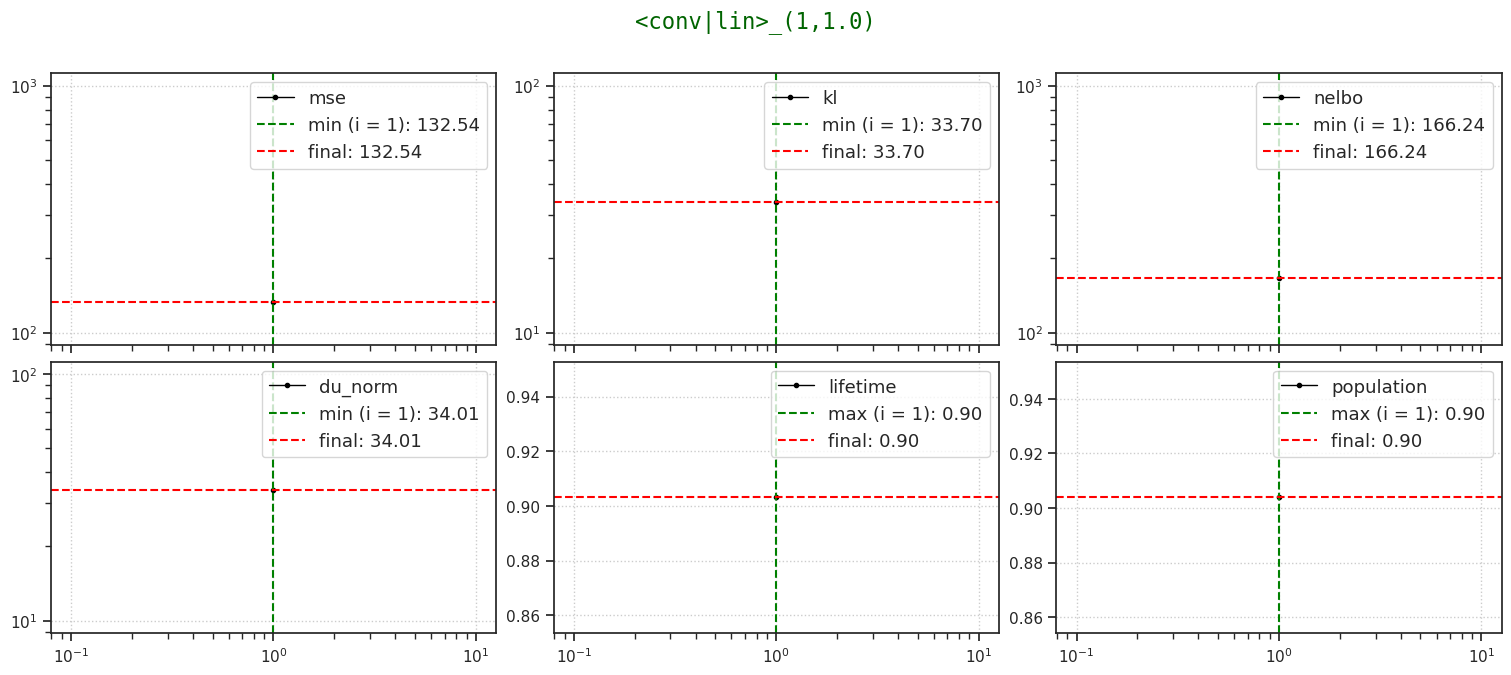

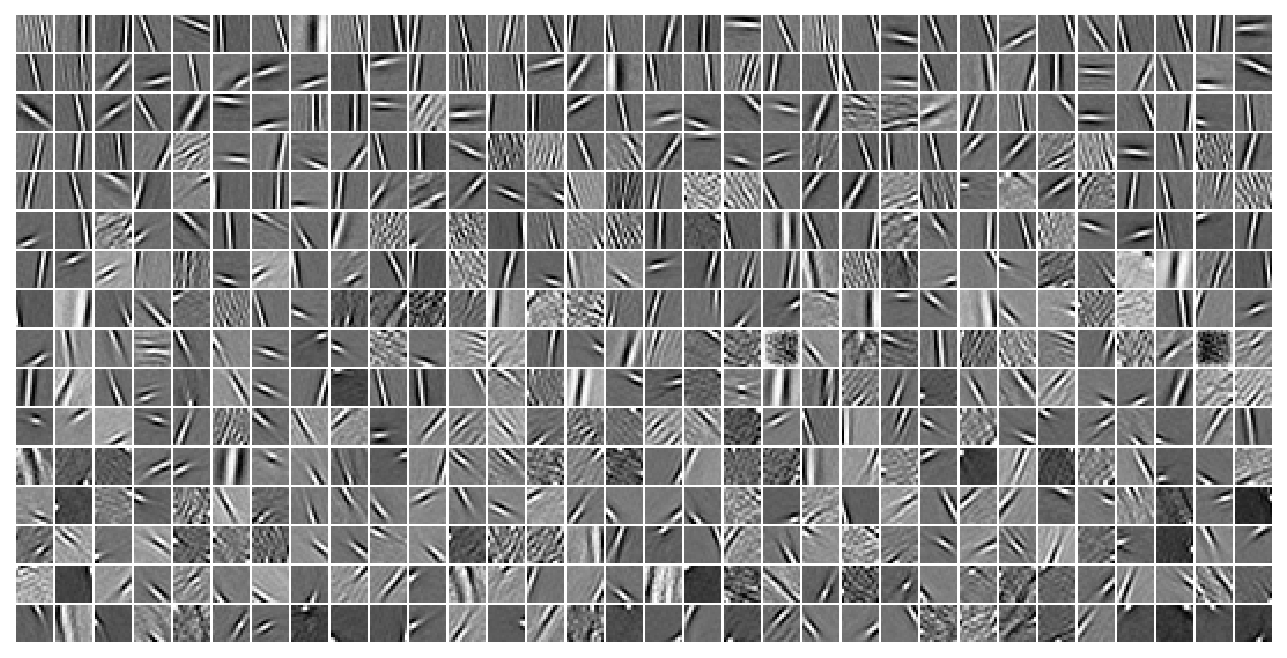

____________________________________________________________________________________________________

<conv|lin>_(1,1.5)      # params: 3.44 M

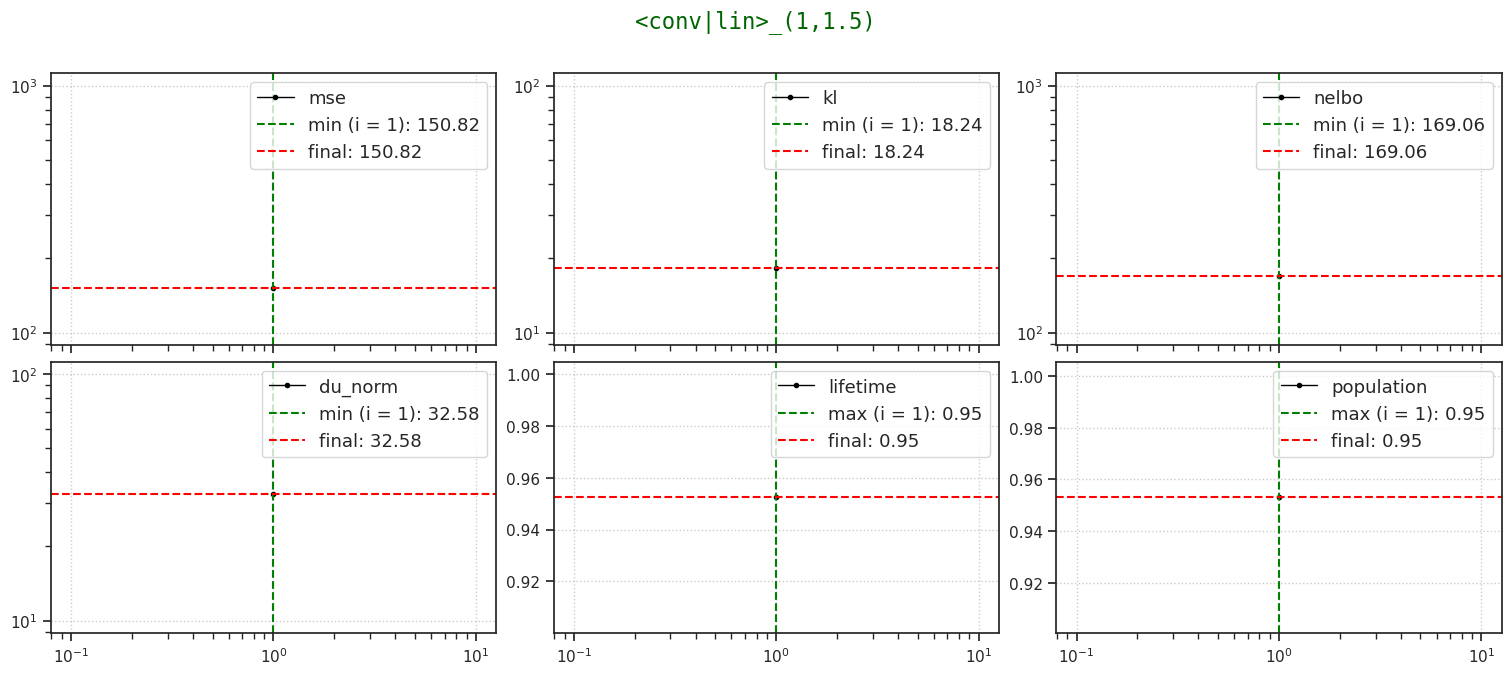

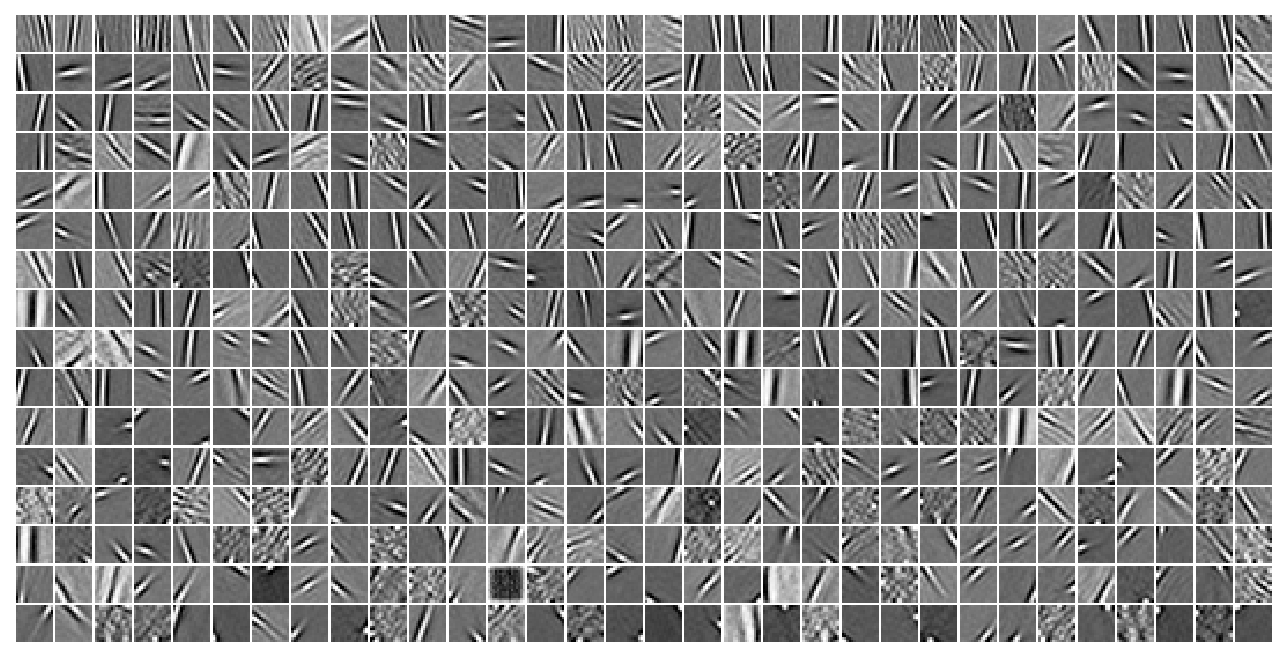

____________________________________________________________________________________________________

<lin|lin>_(1,1.0)_anneal:0.5    # params: 0.26 M

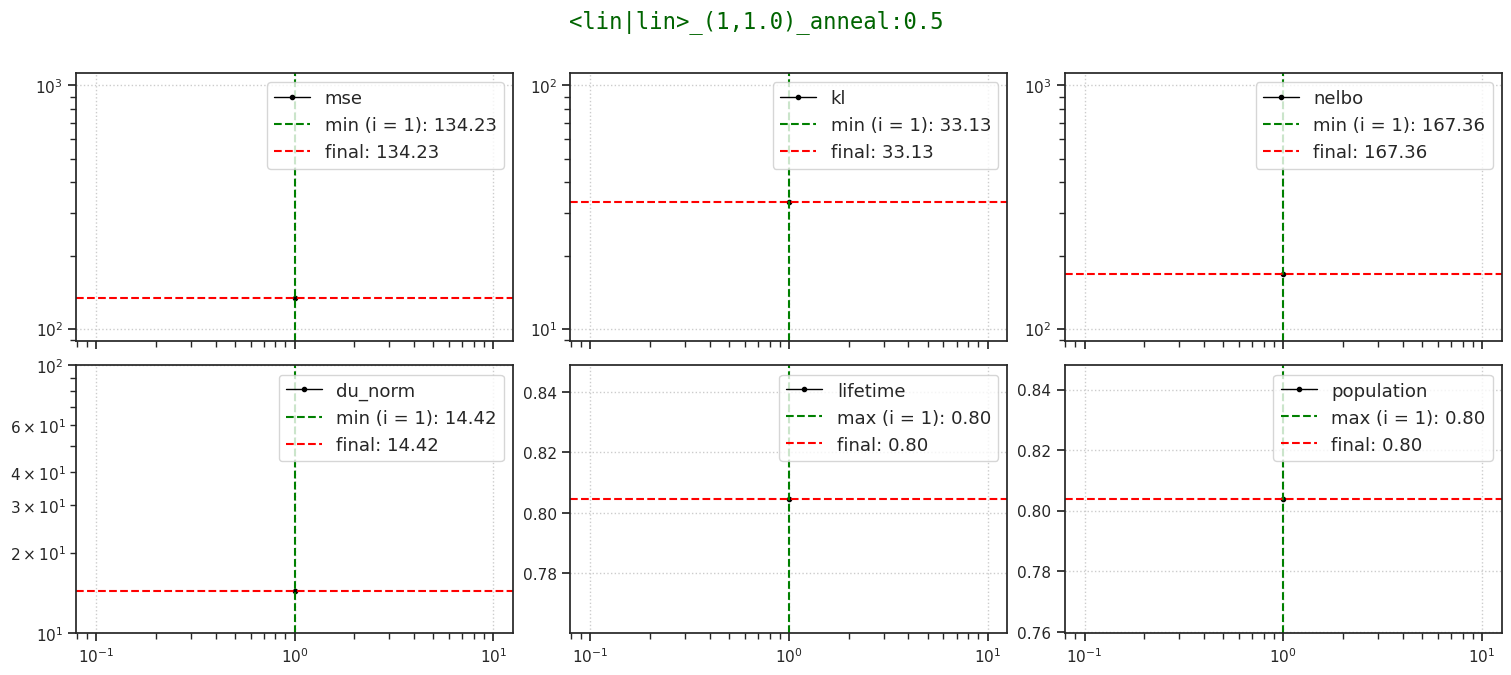

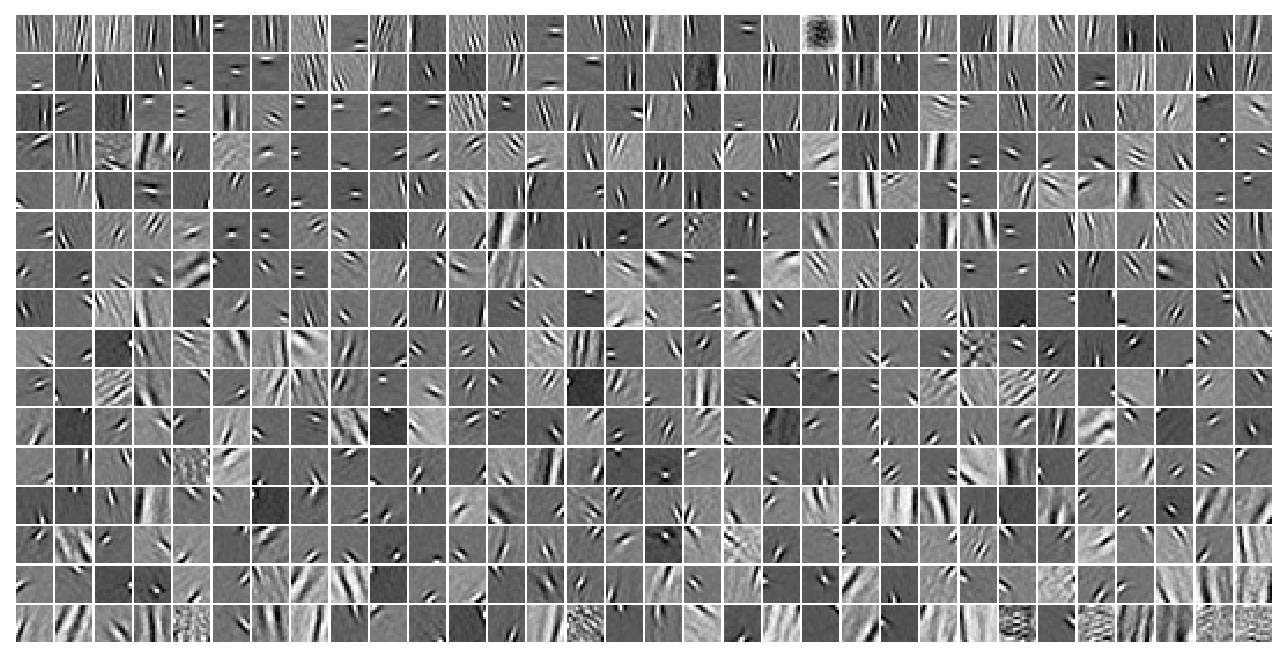

CPU times: user 2min 52s, sys: 8.76 s, total: 3min
Wall time: 16.3 s


In [7]:
%%time


for name, kwargs in pvae_models.items():
    tr, meta = load_model(**kwargs)
    num_params = sum([
    	p.nelement() for p
        in tr.parameters()
    ])

    print('_' * 100)
    print(f"{name}\t# params: {num_params/1e6:0.2f} M")
    
    _eval(10_000, 'k')

    log_rate = tonp(tr.model.layer.log_rate.squeeze())
    _ = tr.model.show(order=np.argsort(log_rate))

    print('\n\n')

In [8]:
seq_total = 1 if tr.model.cfg.seq_len == 1 else 1000
results = tr.analysis(
    dl='vld',
    seq_total=seq_total,
    n_data_batches=None,
    avg_samples=False,
    verbose=False,
)

In [26]:
lamb = tr.to(results['state_final']).exp()
mse_map = tr.model.loss_recon(
    y=tr.model.layer.decode(lamb),
    x=tr.dl_vld.dataset.tensors[0].flatten(start_dim=1),
)
mse_map.mean()

tensor(99.1716, device='cuda:2', grad_fn=<MeanBackward0>)

In [24]:
mse_map.shape

torch.Size([25811])

In [88]:
for name, s in brain_results_str.items():
    print(f"{name}\n{s}\n")

<jacob|lin>_(64,32.0)
# params: 0.13 M        MSE = \entry{12.0}{2.6} lifetime = \entry{0.79}{.04}    % zero = 60.0

<jacob|lin>_(8,4.0)
# params: 0.13 M        MSE = \entry{27.4}{7.1} lifetime = \entry{0.85}{.02}    % zero = 73.2

<jacob|lin>_(4,4.0)
# params: 0.13 M        MSE = \entry{50.3}{15.5}        lifetime = \entry{0.90}{.03}    % zero = 83.3

In [55]:
seq_total = 1 if tr.model.cfg.seq_len == 1 else 1000
results = tr.analysis(
    dl='vld',
    seq_total=seq_total,
    n_data_batches=3,
    avg_samples=True,
    verbose=True,
)

100%|███████████████████████████████████| 3/3 [00:07<00:00,  2.40s/it]


In [56]:
{k: v.shape for k, v in results.items()}

{'kl': (1000,),
 'mse': (1000,),
 'nelbo': (1000,),
 'du_norm': (1000,),
 'lifetime': (1000,),
 'population': (1000,),
 'state_final': (600, 512),
 'samples_final': (600, 512)}

In [57]:
life, pop, _ = sparse_score(results['samples_final'])

In [58]:
life.mean(), life.std()

(0.904784, 0.028996706)

In [59]:
print(portions)

{'0': 83.3, '1': 4.5, '2': 3.2, '3': 2.4, '4': 1.7, '5': 1.3, '6': 0.9, '7+': 2.7}

In [60]:
(results['samples_final'] == 0).mean() * 100

83.38053385416667

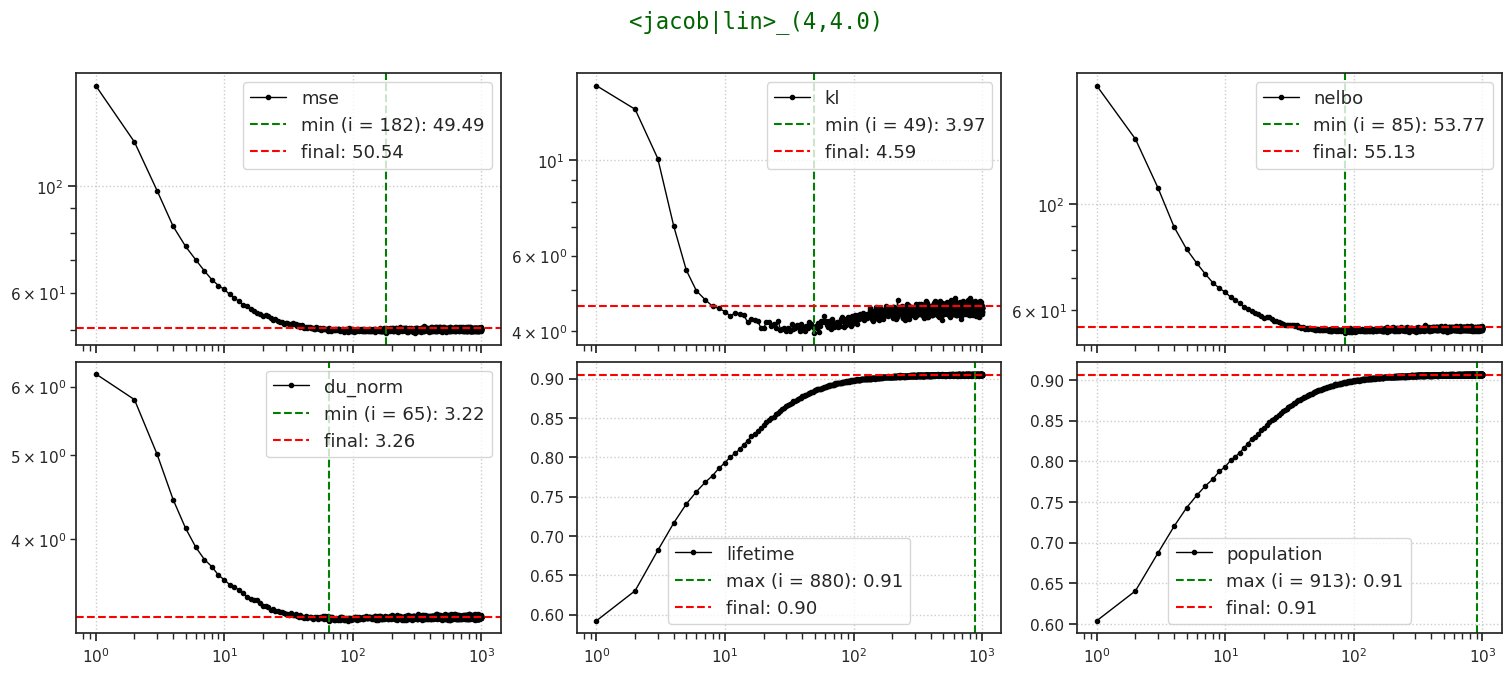

In [61]:
fig, axes = plot_convergence(results, color='k', display=False)
fig.suptitle(name, fontsize=16, fontfamily='monospace', color='darkgreen', y=1.1)
display(fig)

In [63]:
lamb = tr.to(results['state_final']).exp()
mse_map = tr.model.loss_recon(
    y=tr.model.layer.decode(lamb),
    x=tr.dl_vld.dataset.tensors[0].flatten(start_dim=1),
)
mse_map.mean()